In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Part 1. Data Preparation

Here we will work with seaborns dataset 'exercise'

In [38]:
df = sns.load_dataset("exercise")
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [39]:
df.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [40]:
df.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [41]:
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89], dtype=int64)

In [42]:
# Let's delete the column Unnamed: 0, because it does not contain useful data, only record indexes
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [43]:
df['id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [44]:
df.drop(columns=['id'], inplace=True)
df

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


In [45]:
print(df['diet'].unique())
print(df['time'].unique())
print(df['kind'].unique())

['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']
['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']
['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']


# Label category columns

In [46]:
df.dtypes

diet     category
pulse       int64
time     category
kind     category
dtype: object

In [47]:
df[df.select_dtypes(include=['category']).columns] = df.select_dtypes(include=['category']).astype(str)

for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    df[column] = df[column].replace(mapping)

df

,diet,pulse,time,kind
0,0,85,0,0
1,0,85,1,0
2,0,88,2,0
3,0,90,0,0
4,0,92,1,0
...,...,...,...,...
85,1,135,1,2
86,1,130,2,2
87,1,99,0,2
88,1,111,1,2


In [48]:
df = df.reindex(columns=['kind', 'time', 'diet', 'pulse'])
df

,kind,time,diet,pulse
0,0,0,0,85
1,0,1,0,85
2,0,2,0,88
3,0,0,0,90
4,0,1,0,92
...,...,...,...,...
85,2,1,1,135
86,2,2,1,130
87,2,0,1,99
88,2,1,1,111


In [49]:
# Dividing the data into features and target
X = df.drop(columns=['pulse'])
y = df['pulse']

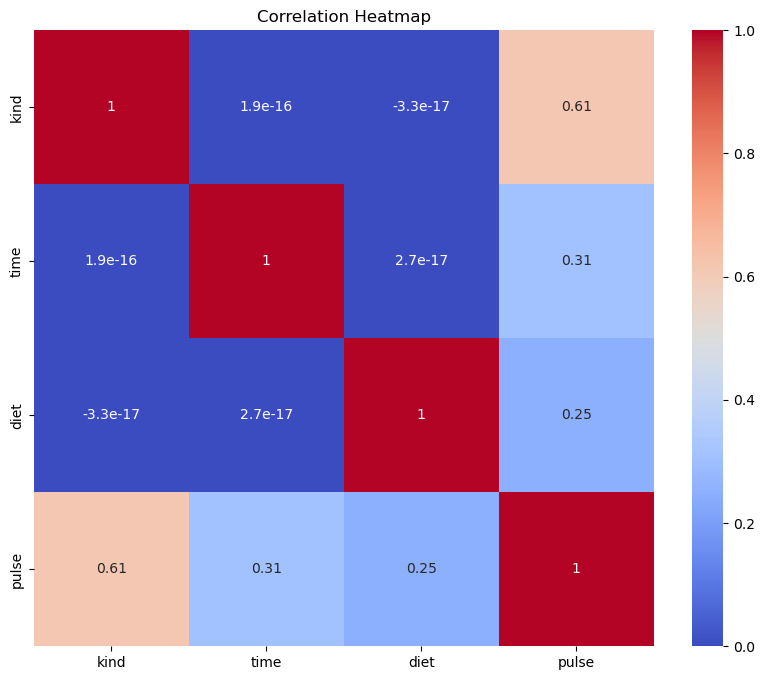

In [50]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the correlation map we can see features that more or less impact on the target variable. Among the most impactfull are 'kind' and 'time'

In [51]:
# Let's split dataset into train, validation and test sets in a ratio of 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True)

X_train.shape, X_val.shape, X_test.shape

((62, 3), (14, 3), (14, 3))

In [52]:
# Replace NaN values ​​with average
# We chose to replace values ​​with the mean due to the small size of the dataset, and normalization by deletion would be inappropriate, to further reduce the dataset
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)
X_val.fillna(X_val.mean(numeric_only=True), inplace=True)
X_test.fillna(X_test.mean(numeric_only=True), inplace=True)

In [53]:
scaler_y = StandardScaler()
scaler_y.fit(y_train.values.reshape(-1, 1))

X_train_normalized = X_train.copy().values
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

X_val_normalized = X_val.copy().values
X_test_normalized = X_test.copy().values
y_val_normalized = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

In [54]:
print(X_test_normalized, y_test_normalized)

[[1 2 0]
 [2 1 0]
 [2 1 1]
 [0 1 1]
 [1 0 1]
 [2 2 1]
 [1 2 1]
 [2 0 0]
 [2 0 0]
 [1 2 1]
 [0 1 0]
 [1 0 1]
 [0 2 1]
 [0 1 0]] [[-0.48891839]
 [ 0.36606198]
 [ 1.92057174]
 [-0.02256546]
 [-0.17801644]
 [ 2.38692467]
 [-0.79982035]
 [-0.10029095]
 [-0.48891839]
 [-0.72209486]
 [-1.34389876]
 [-1.18844779]
 [-0.72209486]
 [-1.1107223 ]]


# Part 2

In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [56]:
class DecisionTreeModel:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.model = DecisionTreeRegressor(max_depth=max_depth, random_state=317)
    
    def train(self, X_train_normalized, y_train_normalized):
        self.model.fit(X_train_normalized, y_train_normalized)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def calculate_mse(self, X, y):
        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)
    
    def visualize_tree(self, feature_names):
        plt.figure(figsize=(20, 15))
        plot_tree(self.model, feature_names=feature_names, filled=True, rounded=True)
        plt.show()

Decision Tree with Depth 4


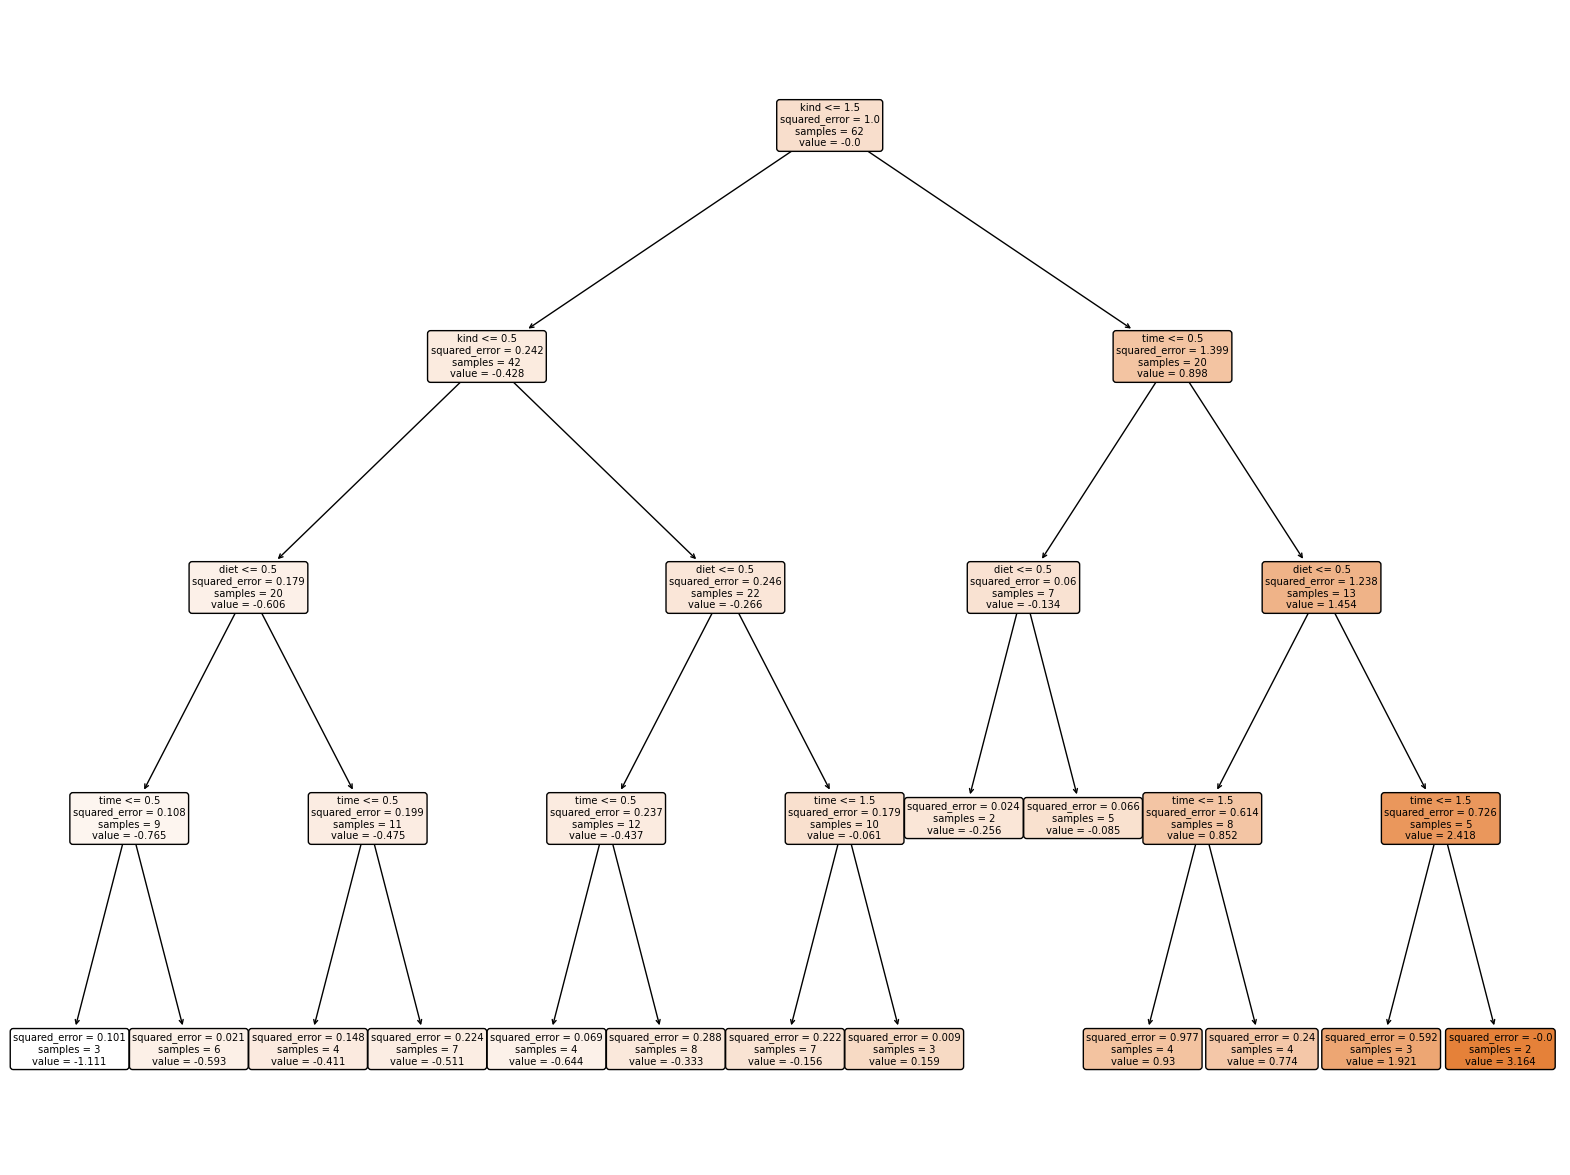

Train MSE: 0.222274903 | Validation MSE: 0.379117459 | Test MSE: 0.350166615

Decision Tree with Depth 6


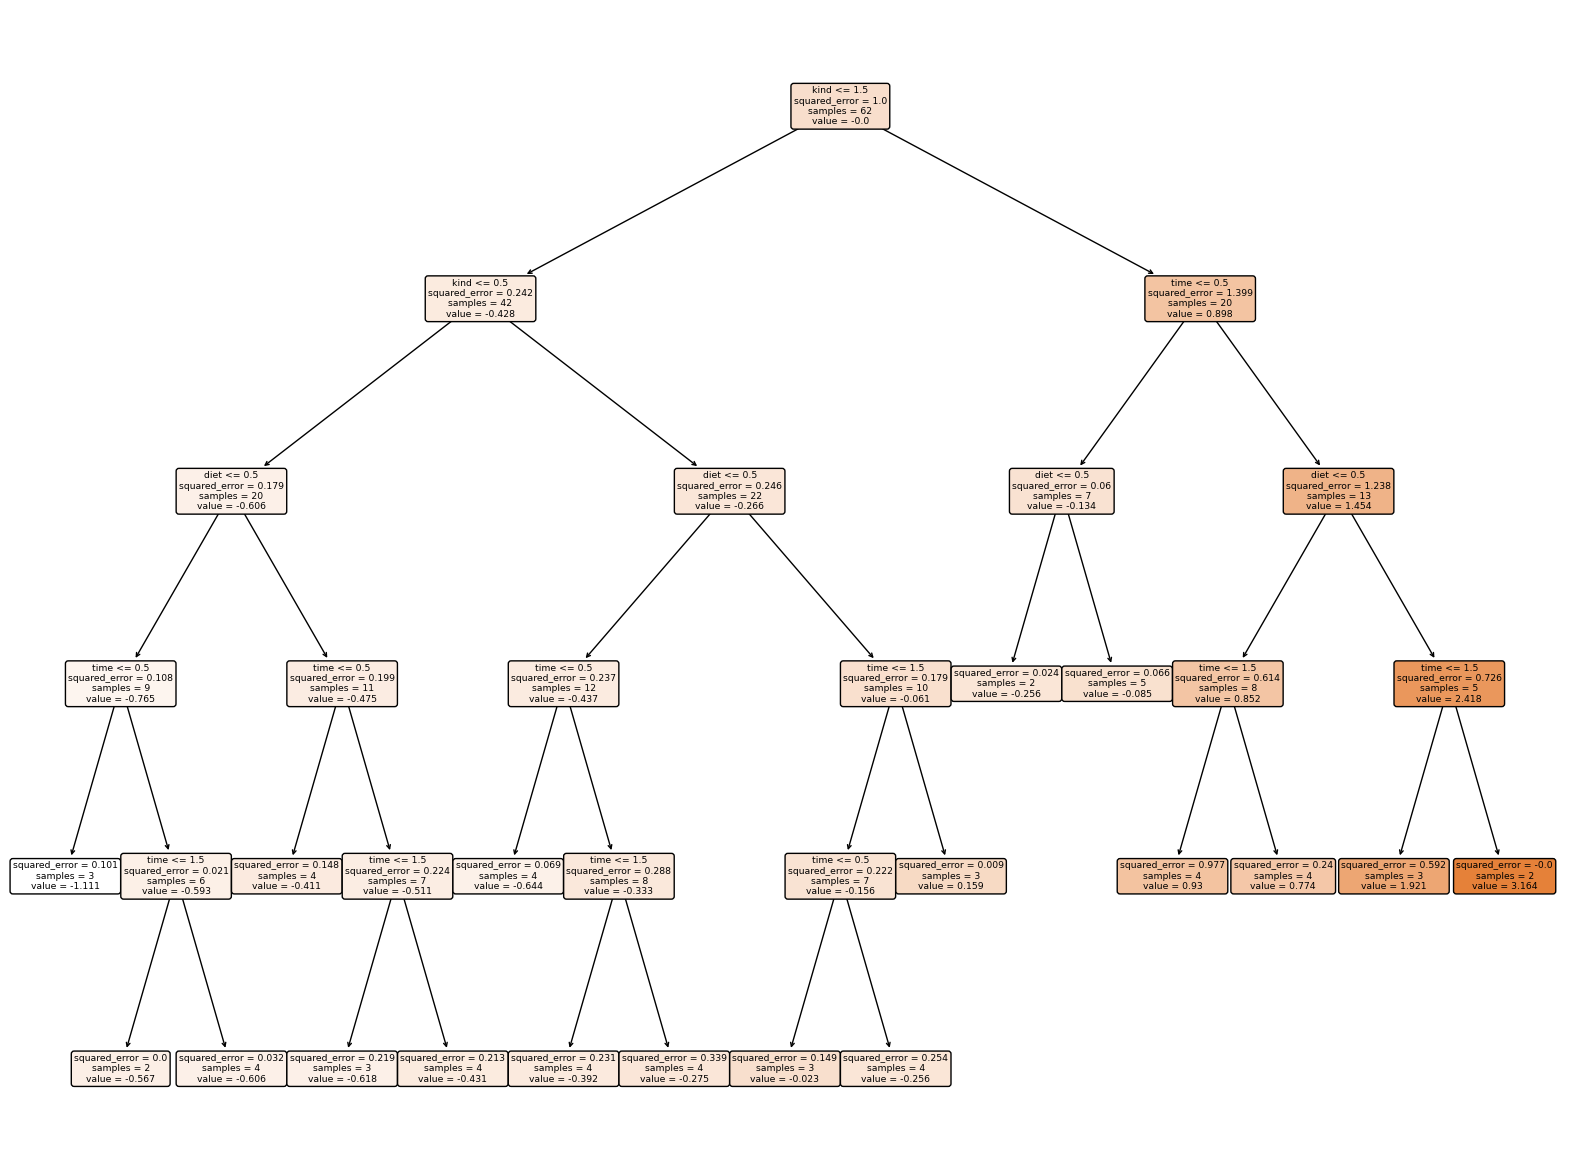

Train MSE: 0.219325037 | Validation MSE: 0.386202585 | Test MSE: 0.390316989

Decision Tree with Depth 9


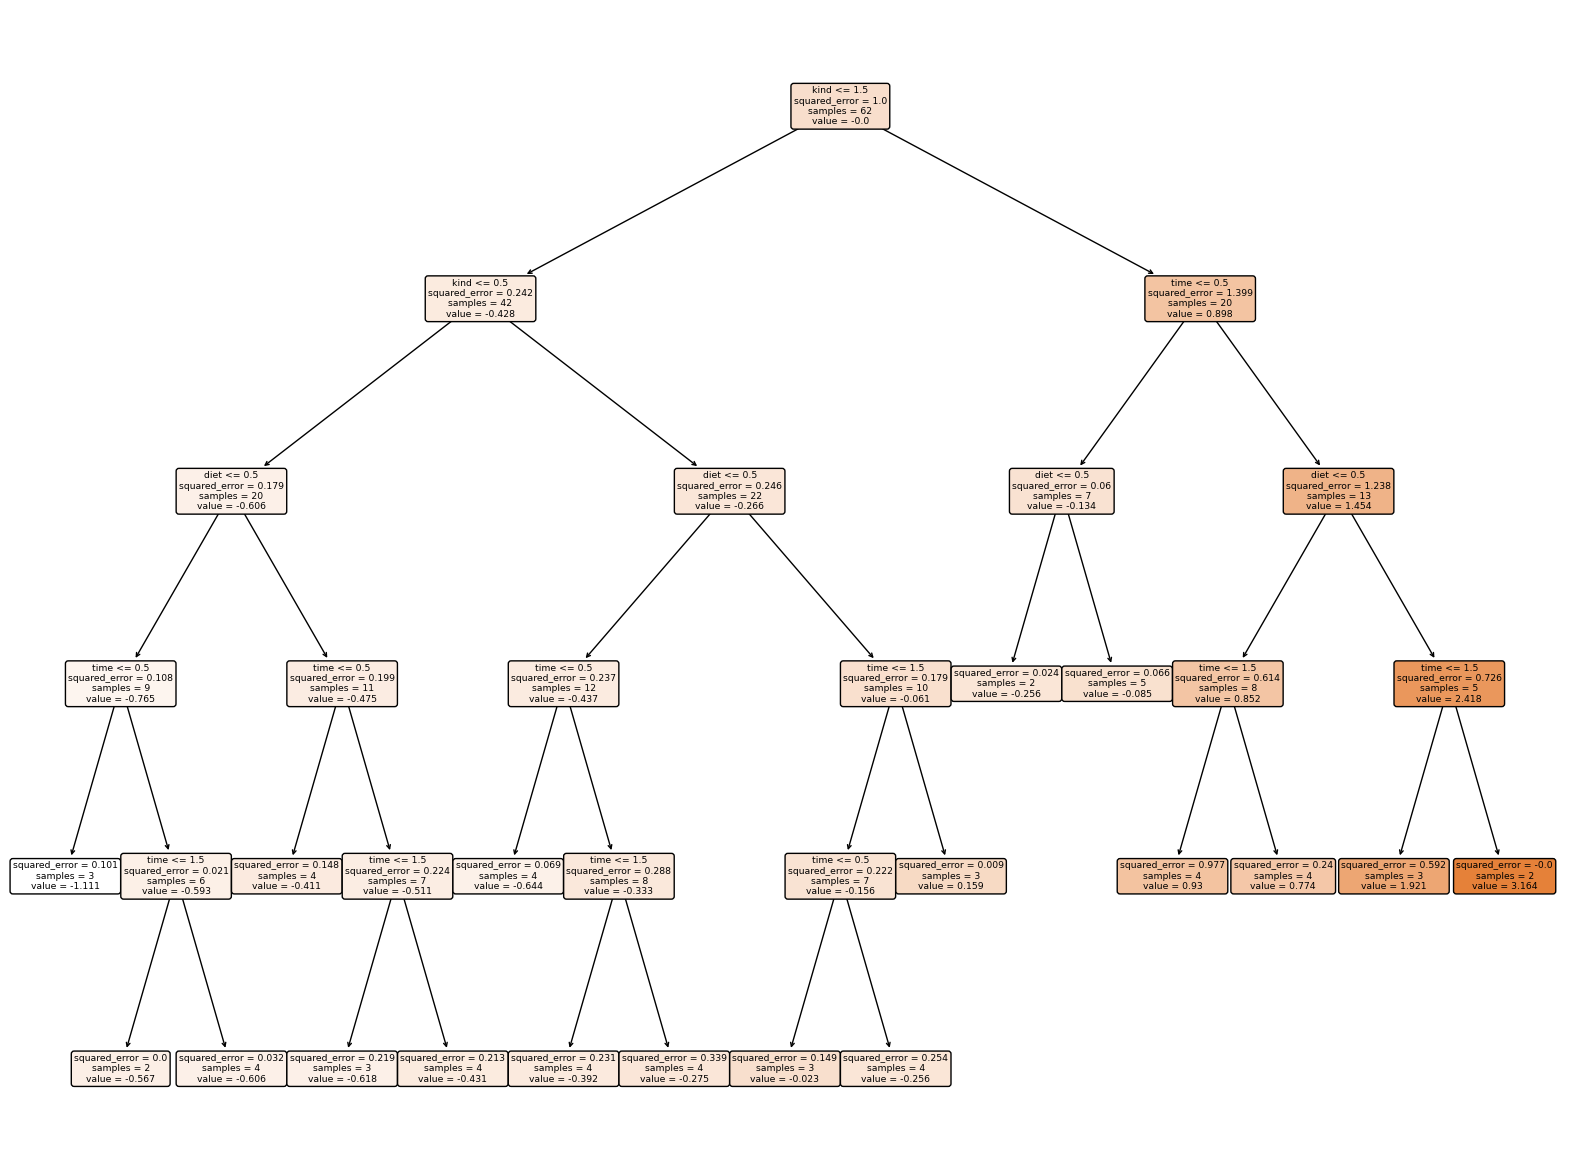

Train MSE: 0.219325037 | Validation MSE: 0.386202585 | Test MSE: 0.390316989



In [57]:
depths = [4, 6, 9] # initialize tree's depths
trees = []

for depth in depths:
    tree = DecisionTreeModel(max_depth=depth)
    tree.train(X_train_normalized, y_train_normalized)
    trees.append(tree)

for i, tree in enumerate(trees):
    print(f"Decision Tree with Depth {depths[i]}")
    tree.visualize_tree(feature_names=list(X.columns))
    train_mse = tree.calculate_mse(X_train_normalized, y_train_normalized)
    val_mse = tree.calculate_mse(X_val_normalized, y_val_normalized)
    test_mse = tree.calculate_mse(X_test_normalized, y_test_normalized)
    
    print(f"Train MSE: {train_mse:.9f} | Validation MSE: {val_mse:.9f} | Test MSE: {test_mse:.9f}")
    print()

As we can see, the smallest error in testing is 0.350166615 for a depth of 4, which is quite a good result. Test accuracies for other depths are also close to this value.

# Part 3. Adding noise.

In [58]:
# Let's add the noise to the training data
X_noise = np.random.uniform(low=-0.1, high=0.11, size=X_train_normalized.shape)
y_noise = np.random.uniform(low=-0.1, high=0.11, size=y_train_normalized.shape)
X_train_noisy = X_train_normalized + X_noise
y_train_noisy = y_train_normalized + y_noise

In [59]:
X_train_normalized

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0],
       [2, 2, 0],
       [1, 2, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 2, 1],
       [1, 2, 0],
       [1, 2, 0],
       [2, 2, 0],
       [0, 2, 0],
       [2, 0, 0],
       [2, 1, 0],
       [2, 0, 1],
       [1, 0, 0],
       [1, 2, 1],
       [2, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 2, 0],
       [0, 1, 1],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 0],
       [0, 0, 0],
       [2, 1, 0],
       [2, 2, 0],
       [2, 0, 1],
       [1, 2, 0],
       [2, 1, 1],
       [2, 1, 0],
       [1, 1, 1],
       [0, 1, 1],
       [2, 0, 0],
       [2, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [2, 0, 1],
       [1, 0, 0],
       [1, 2, 1],
       [2, 1, 0],
       [2, 0, 1],
       [0, 2, 0],
       [2, 2, 0],
       [0, 0, 1],
       [1, 0, 1],
       [2, 2, 1],
       [1, 0, 1],
       [2, 1, 1],
       [2, 0, 1],
       [1, 2, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0,

In [60]:
X_train_noisy

array([[-5.64606699e-02,  1.04648793e+00, -6.34535386e-02],
       [-2.95633128e-02, -8.12645224e-02,  9.60237871e-01],
       [ 1.01728243e-01,  1.03513145e-01,  5.65107498e-02],
       [ 1.93658051e+00,  2.02192752e+00, -4.49266301e-02],
       [ 1.06123499e+00,  2.08367071e+00, -6.67665201e-02],
       [ 1.80116008e-02,  1.03140024e+00, -1.72855584e-02],
       [ 1.04208837e+00,  1.09277642e+00,  2.47812372e-02],
       [-9.84317234e-02,  2.05133193e+00,  9.64703723e-01],
       [ 9.32351353e-01,  2.07380043e+00, -8.72530387e-02],
       [ 1.05882581e+00,  1.92186867e+00,  2.44606593e-02],
       [ 1.97064876e+00,  1.92566251e+00,  2.55825059e-02],
       [-6.58652290e-02,  1.97663966e+00,  2.27930921e-02],
       [ 2.05966592e+00, -6.46915919e-02, -2.88571243e-02],
       [ 1.99038700e+00,  1.08900276e+00, -2.43391350e-02],
       [ 2.10148953e+00,  3.81690604e-02,  9.90118600e-01],
       [ 1.07164047e+00,  9.53914244e-02,  2.03113603e-03],
       [ 9.00836767e-01,  2.04418247e+00

Decision Tree with Depth 4


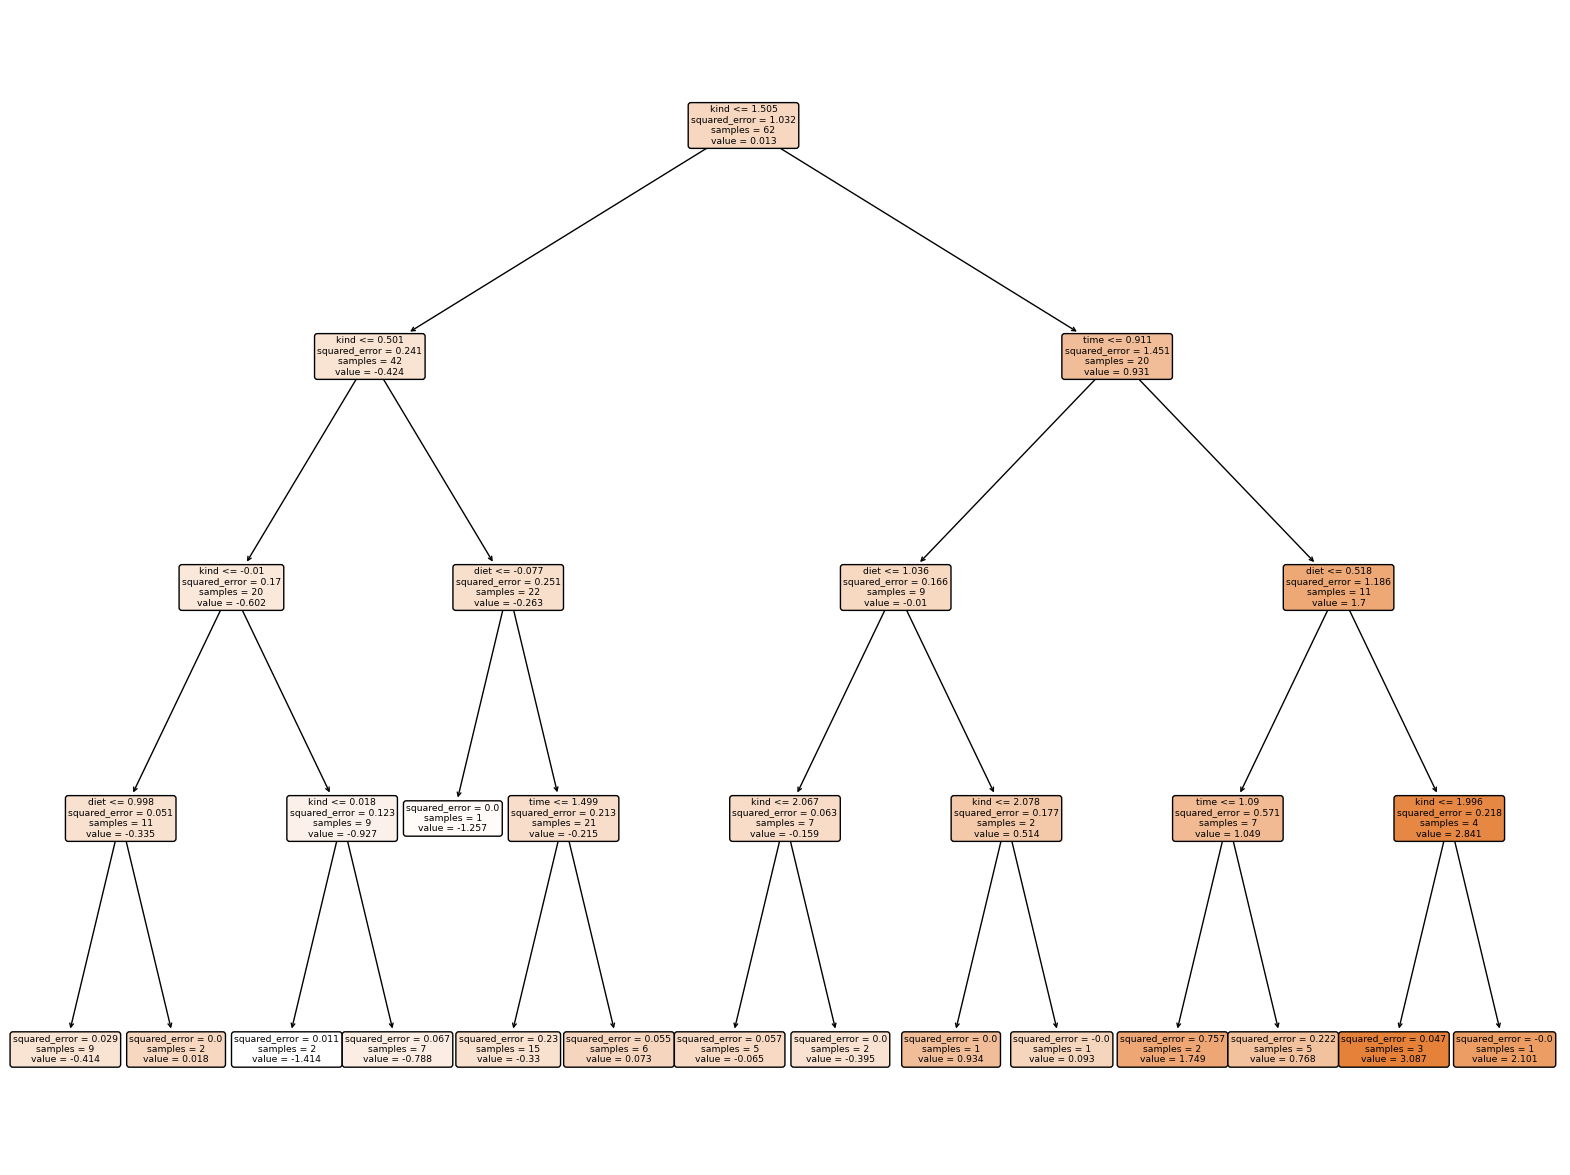

Train MSE: 0.122369388 | Validation MSE: 0.853807987 | Test MSE: 0.513672463

Decision Tree with Depth 6


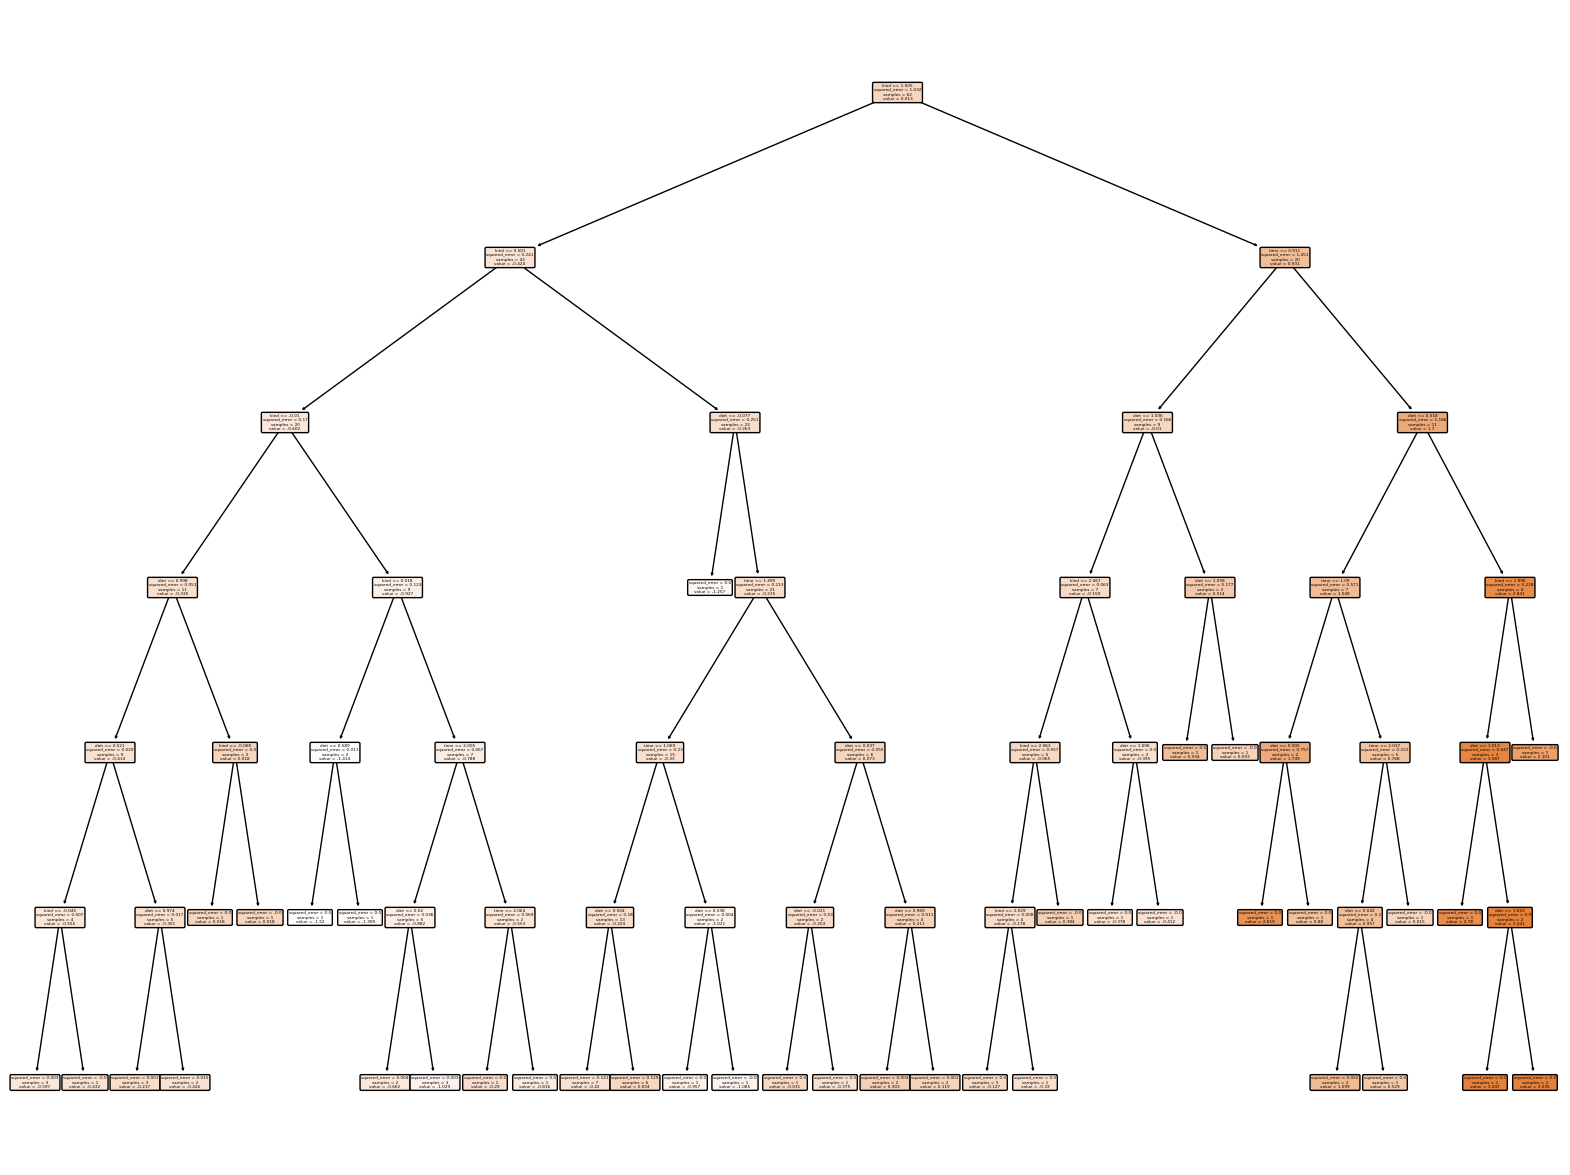

Train MSE: 0.032110230 | Validation MSE: 0.812041038 | Test MSE: 0.752929278

Decision Tree with Depth 9


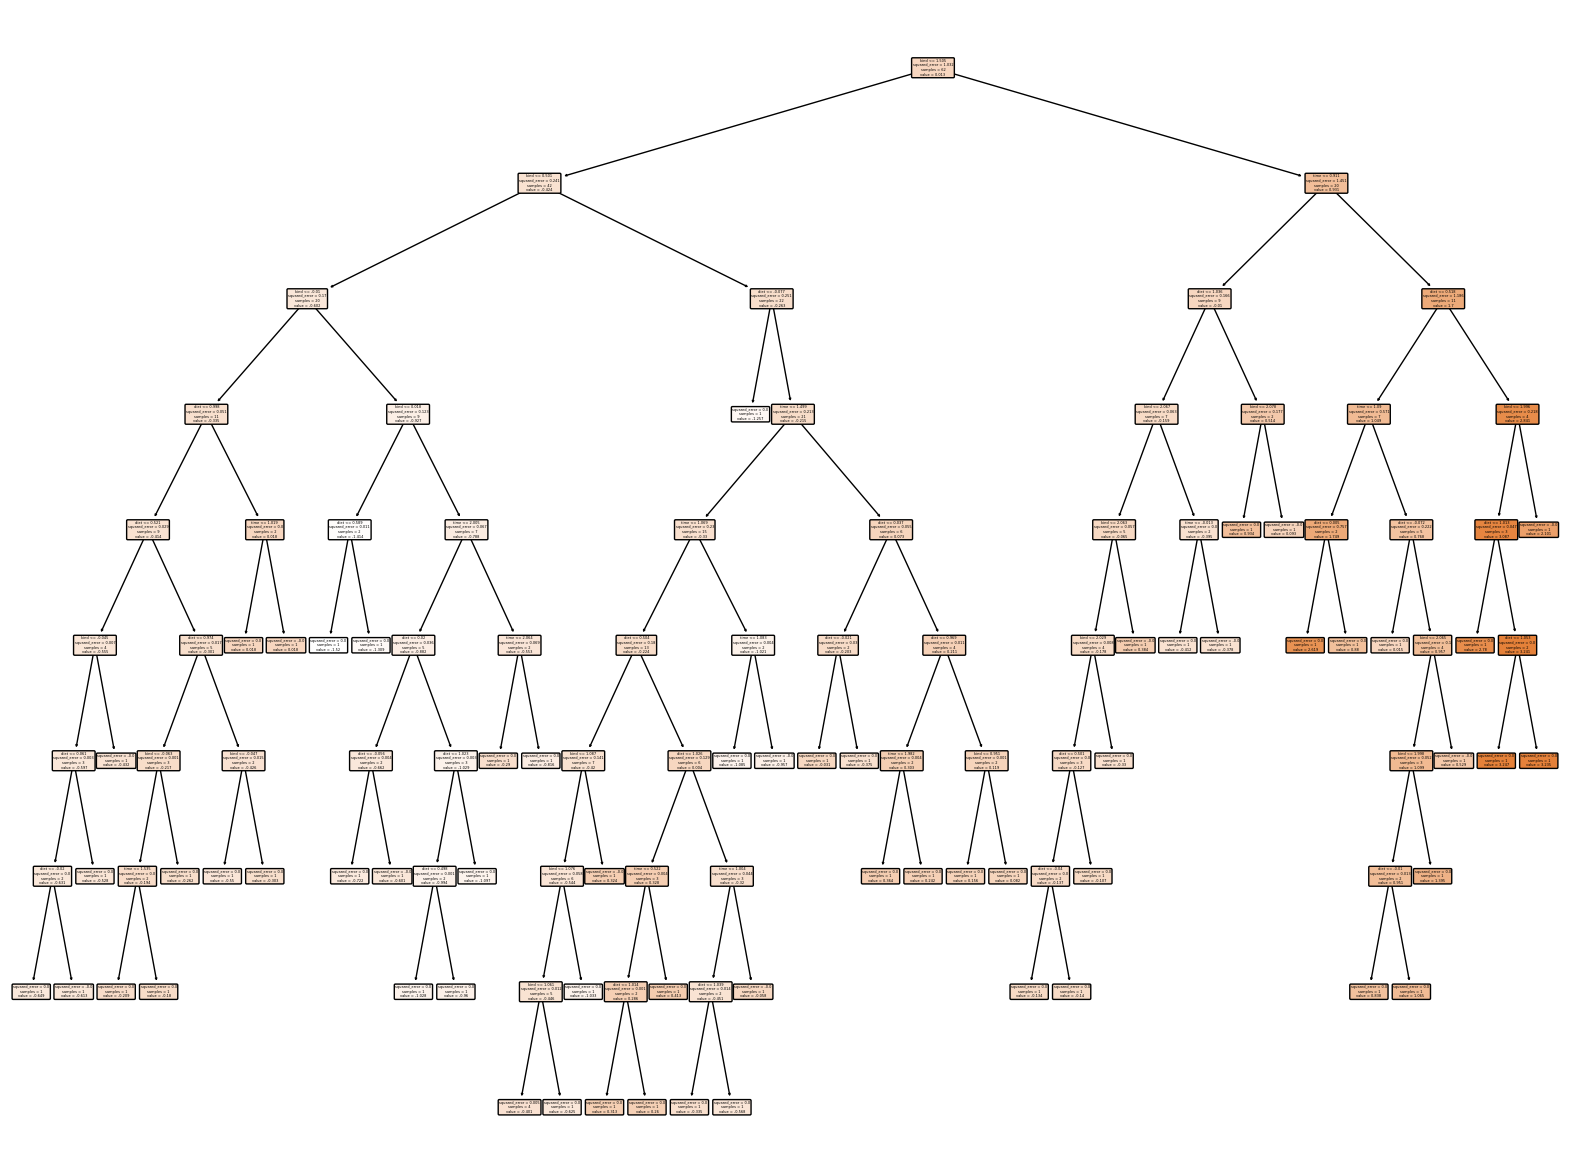

Train MSE: 0.000296791 | Validation MSE: 0.763860739 | Test MSE: 0.817368441



In [61]:
trees_with_noise = []

for depth in depths:
    tree = DecisionTreeModel(max_depth=depth)
    tree.train(X_train_noisy, y_train_noisy)
    trees_with_noise.append(tree)

for i, tree in enumerate(trees_with_noise):
    print(f"Decision Tree with Depth {depths[i]}")
    tree.visualize_tree(feature_names=list(X.columns))
    train_mse = tree.calculate_mse(X_train_noisy, y_train_noisy)
    val_mse = tree.calculate_mse(X_val_normalized, y_val_normalized)
    test_mse = tree.calculate_mse(X_test_normalized, y_test_normalized)
    
    print(f"Train MSE: {train_mse:.9f} | Validation MSE: {val_mse:.9f} | Test MSE: {test_mse:.9f}")
    print()

It can be seen that after denoising the data, the smallest error is now 0.513672463 for a depth of 4, and the degradation of the smallest error relative to the best result for unnoised data is 32%.

# Part 4. Denoising


In [62]:
from sklearn.decomposition import PCA

(62, 2)


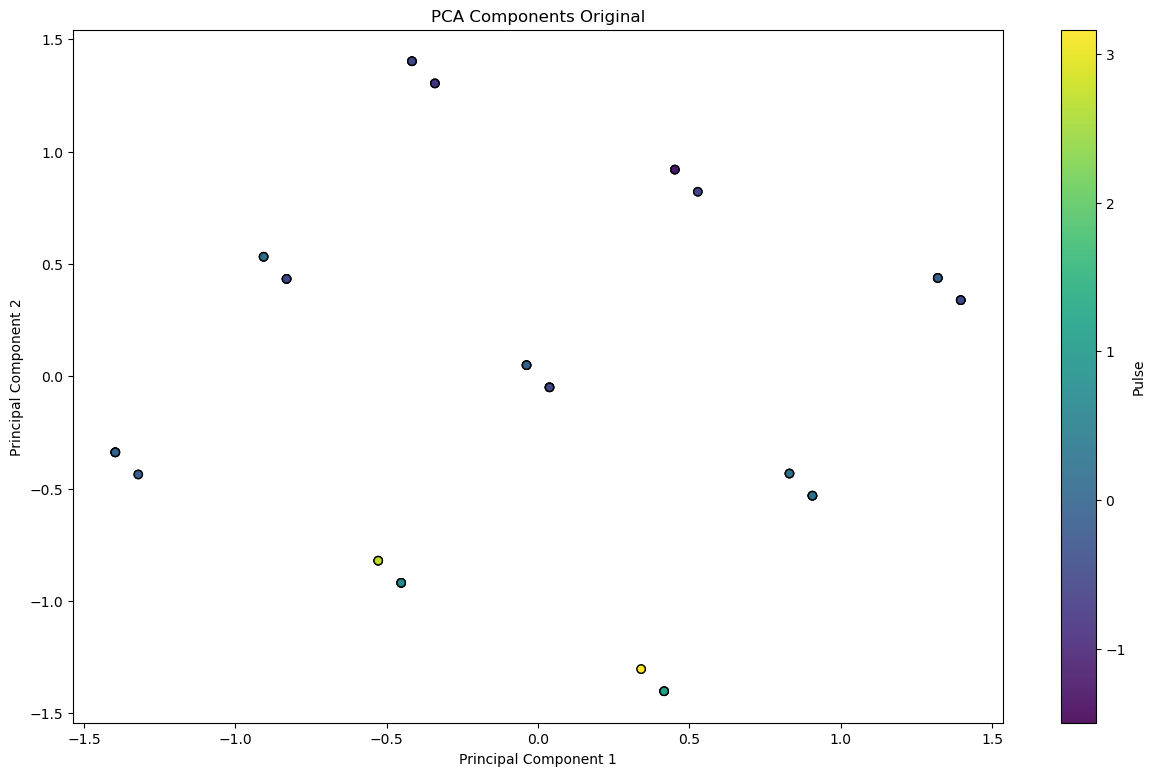

In [63]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)

print(X_train_pca.shape)

plt.figure(figsize=(15, 9))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_normalized, cmap='viridis', edgecolor='k', alpha=0.9)
plt.title('PCA Components Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Pulse')
plt.show()

In [64]:
pca.explained_variance_ratio_

array([0.44502891, 0.40004888])

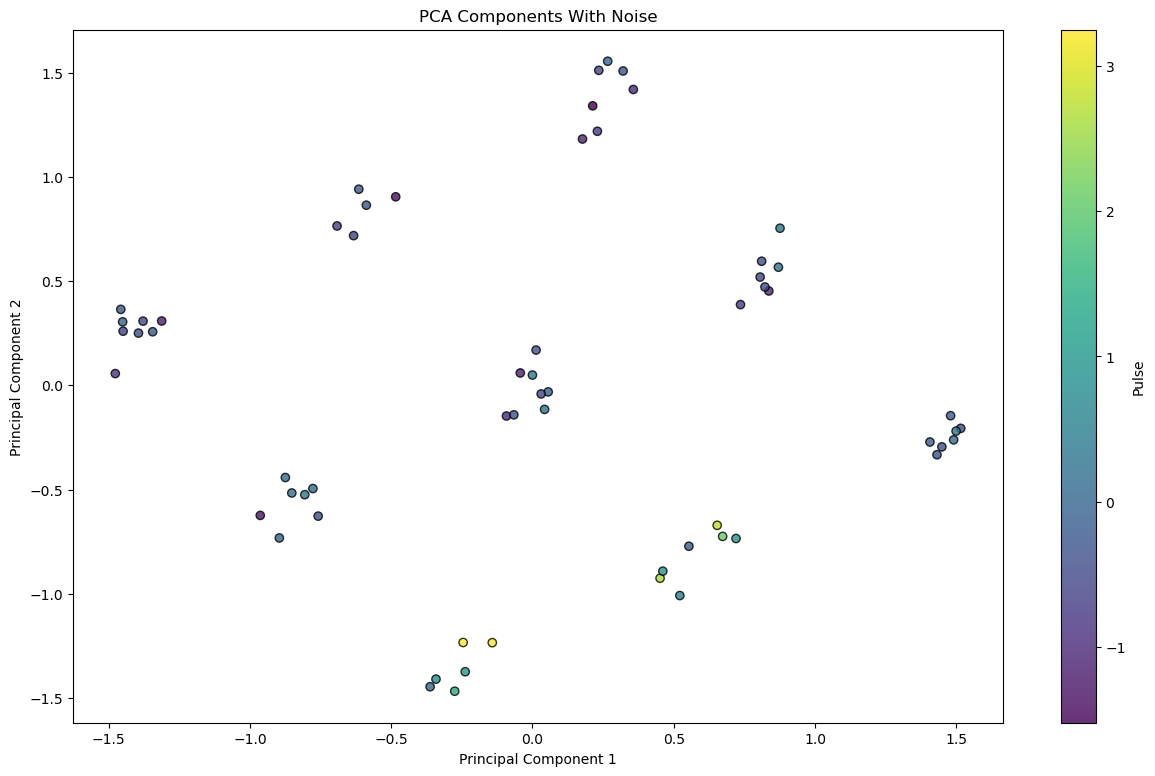

In [65]:
pca_with_noise = PCA(n_components=2)
X_train_pca_noise = pca_with_noise.fit_transform(X_train_noisy)

plt.figure(figsize=(15, 9))
plt.scatter(X_train_pca_noise[:, 0], X_train_pca_noise[:, 1], c=y_train_noisy, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('PCA Components With Noise')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Pulse')
plt.show()

In [66]:
pca_with_noise.explained_variance_ratio_

array([0.45822719, 0.386055  ])

We see that the 2 selected components together explain 95% of the variance

In [67]:
pca_with_noise.explained_variance_

array([0.75357147, 0.63488164])

In [68]:
pca_95 = PCA(n_components=0.95, svd_solver='full')  # Вказуємо 95% дисперсії
X_train_95 = pca_95.fit_transform(X_train_noisy)

X_train_denoised = pca_95.inverse_transform(X_train_95)

In [69]:
print(X_train_normalized[0], X_train_95[0], X_train_denoised[0]) 

[0 1 0] [-0.69168358  0.76478175  0.62166236] [-0.05646067  1.04648793 -0.06345354]


As we can see, the denoised data is very close to the original data, but still not perfect. This may be due to the fact that PCA discards some of the least important information (less important principal components) to reduce the dimensionality of the data.

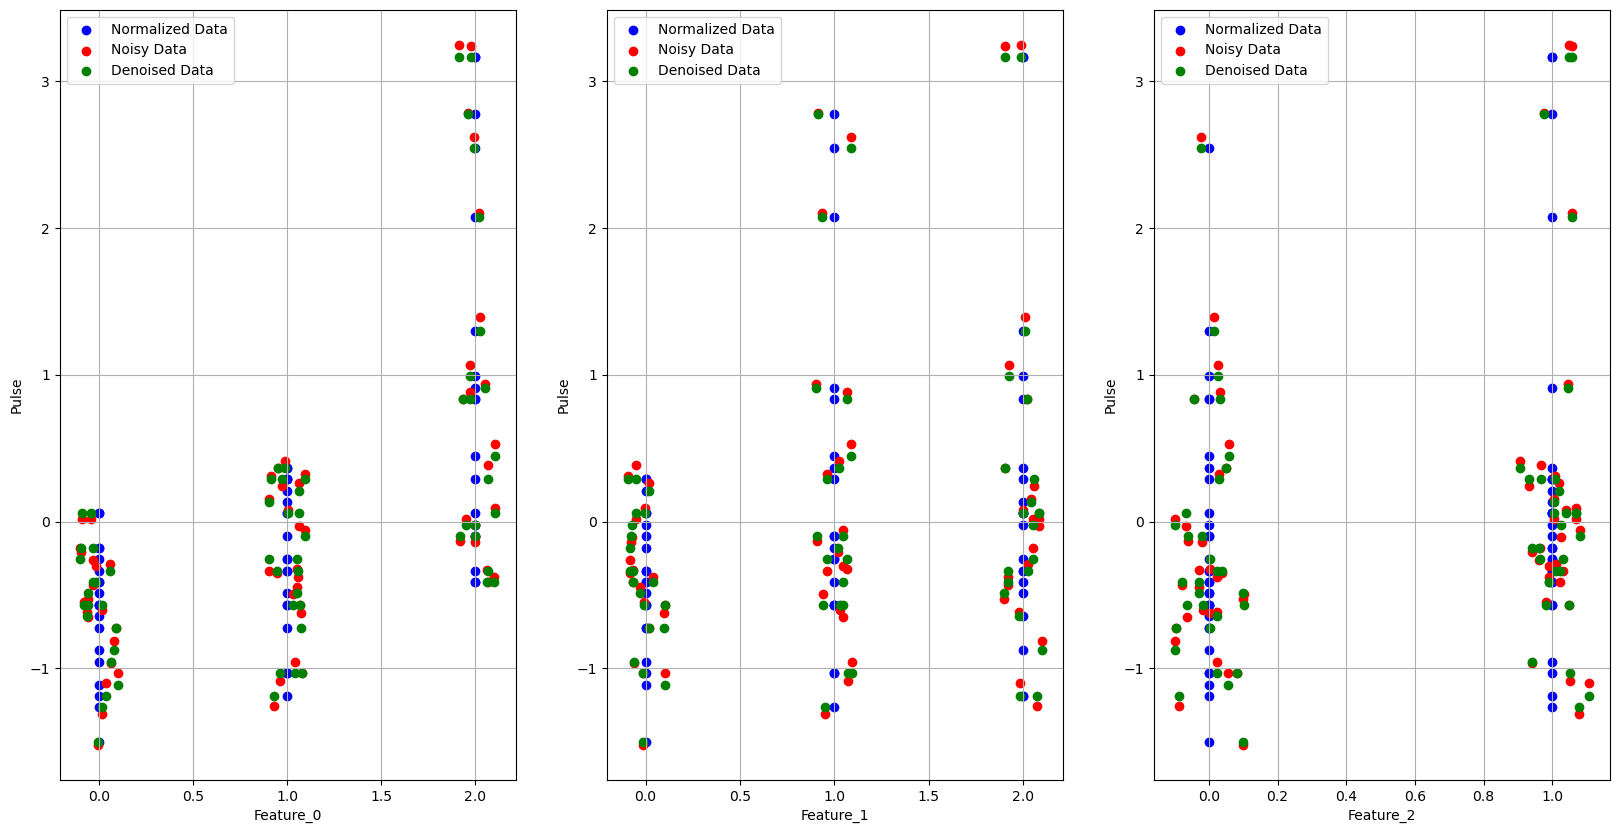

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=X_train_normalized.shape[1], figsize=(20, 10))
feature_names = ['Feature_' + str(i) for i in range(X_train_normalized.shape[1])]
for j, ax in enumerate(axes):
    ax.scatter(X_train_normalized[:, j], y_train_normalized, c='blue', label='Normalized Data')
    ax.scatter(X_train_noisy[:, j], y_train_noisy, c='red', label='Noisy Data')
    ax.scatter(X_train_denoised[:, j], y_train_normalized, c='green', label='Denoised Data')
    
    ax.set_xlabel(f'{feature_names[j]}')
    ax.set_ylabel('Pulse')
    ax.legend()
    ax.grid(True)
   
plt.show()


# Part 5


Decision Tree with Depth 4


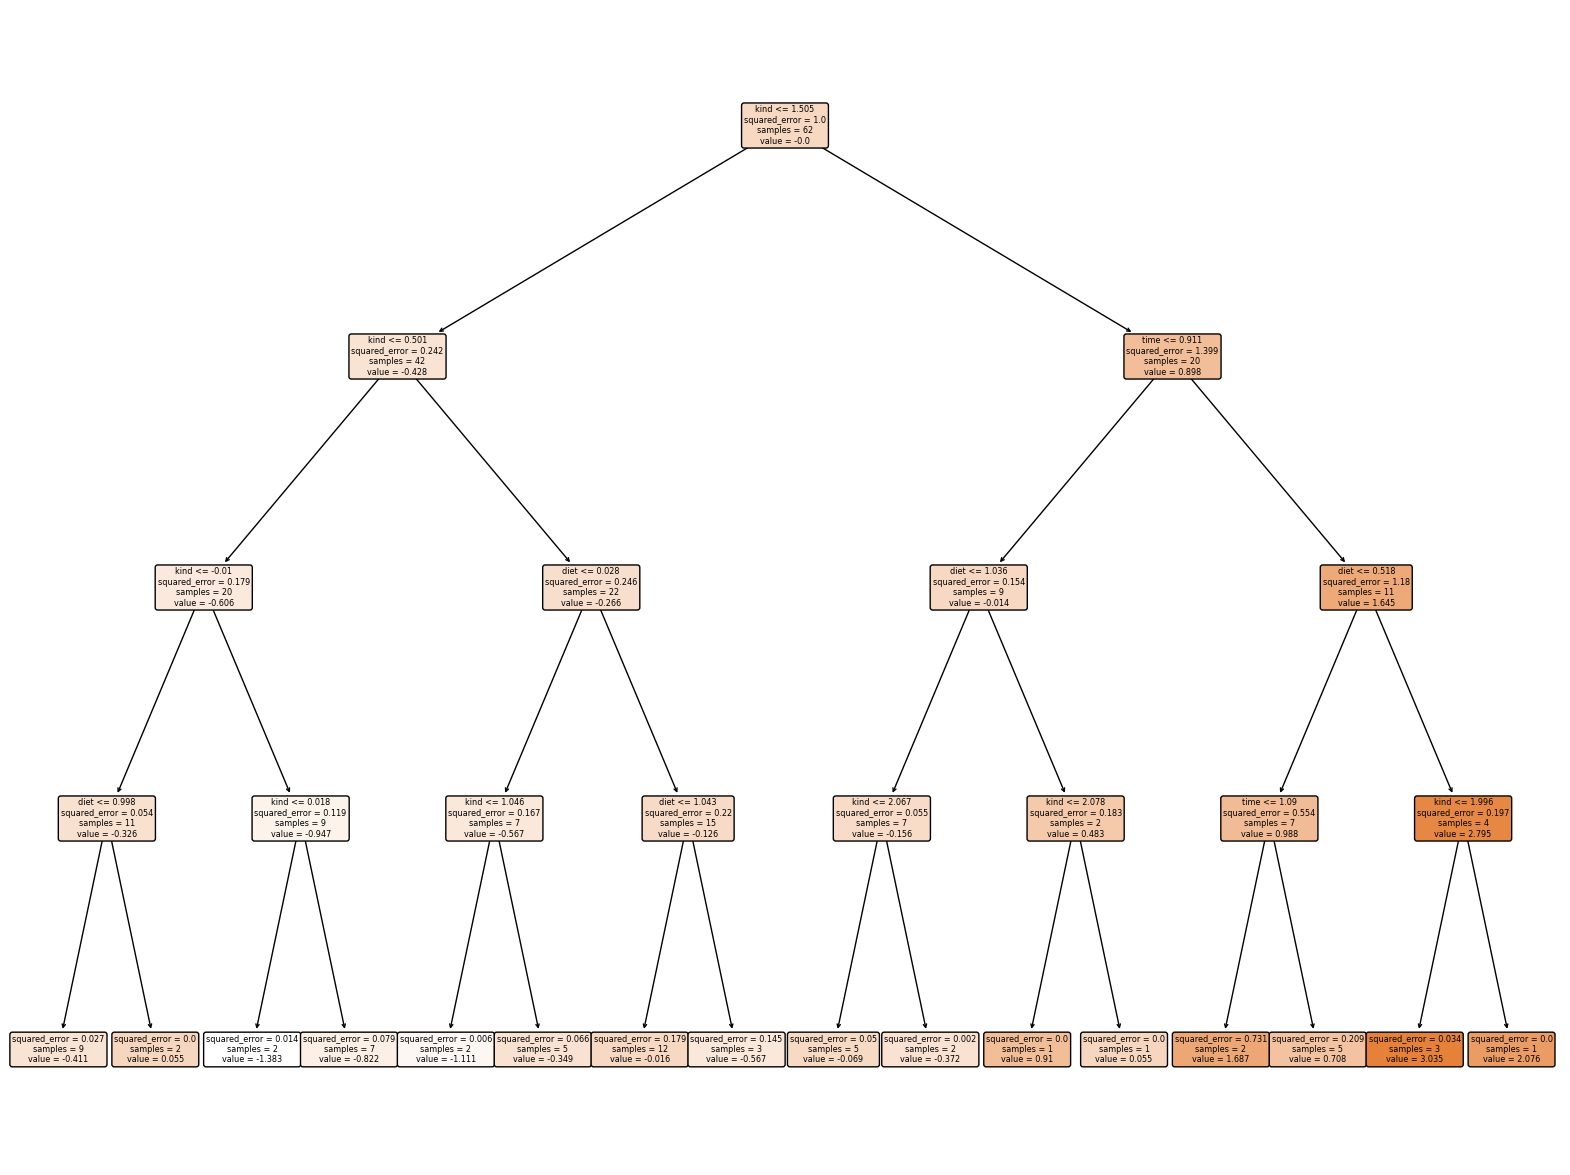

Train MSE: 0.106522065 | Validation MSE: 0.855424072 | Test MSE: 0.521855291

Decision Tree with Depth 6


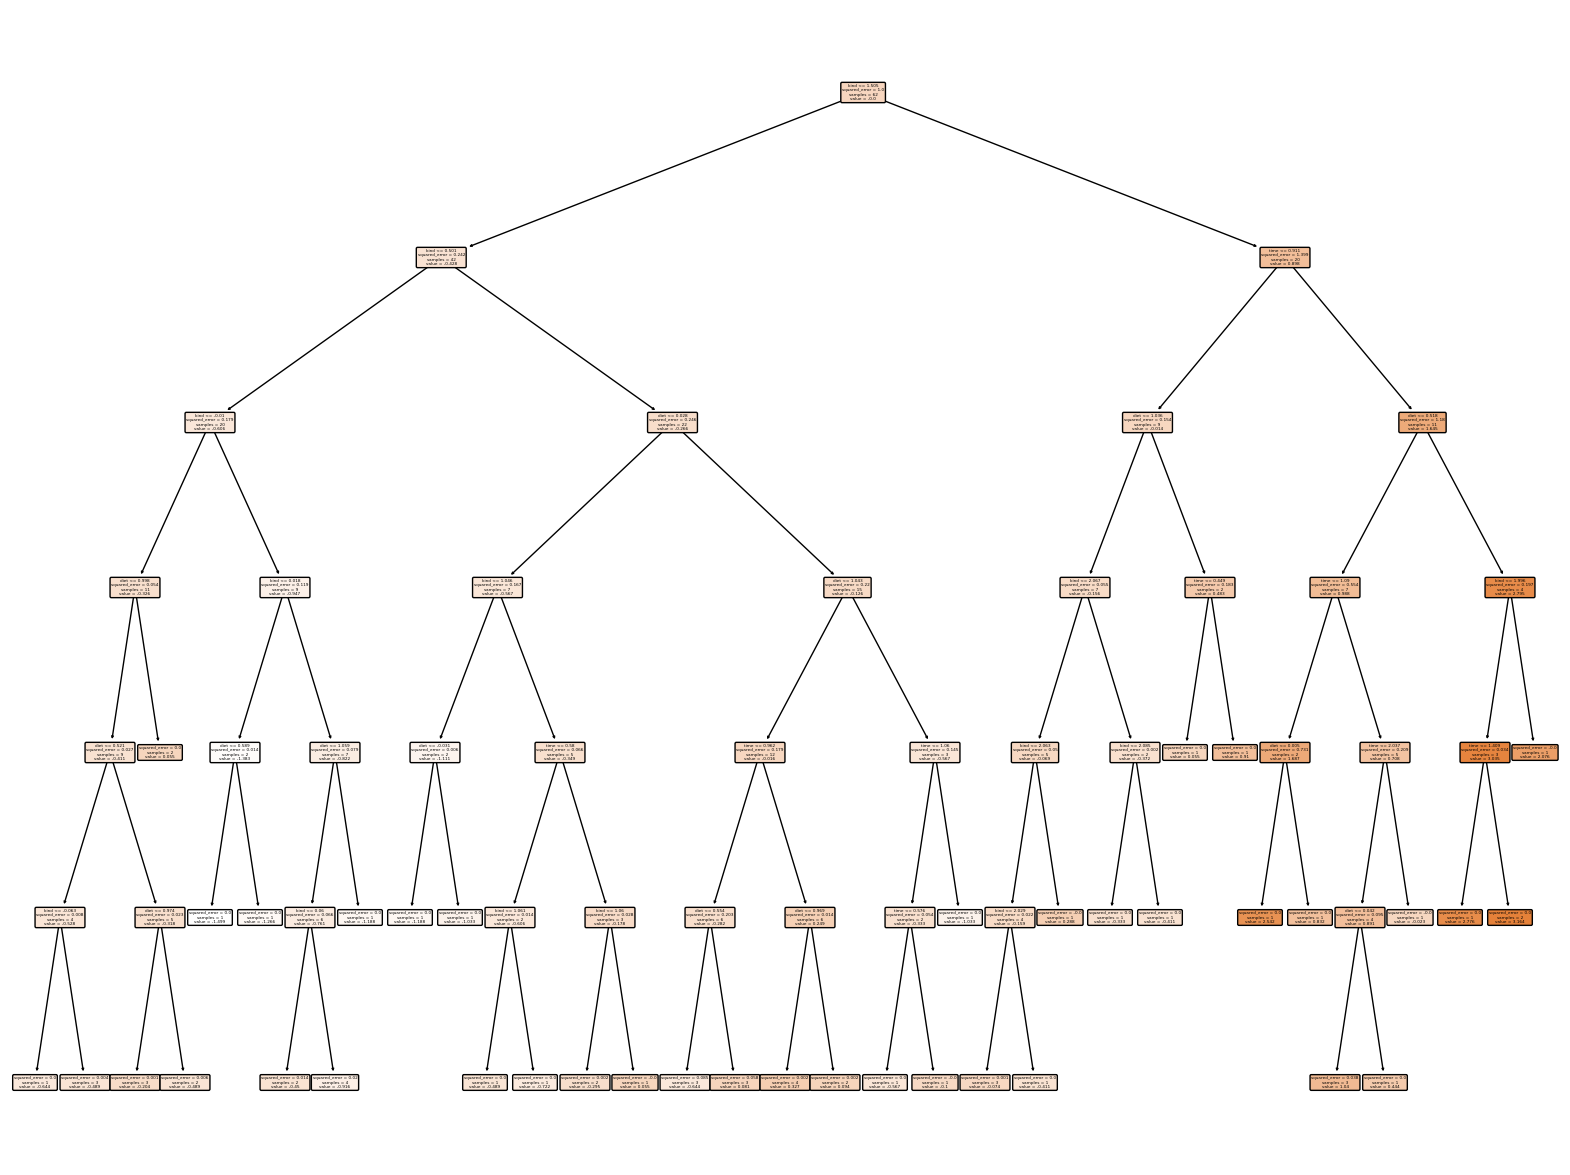

Train MSE: 0.011124348 | Validation MSE: 0.846410500 | Test MSE: 0.749091213

Decision Tree with Depth 9


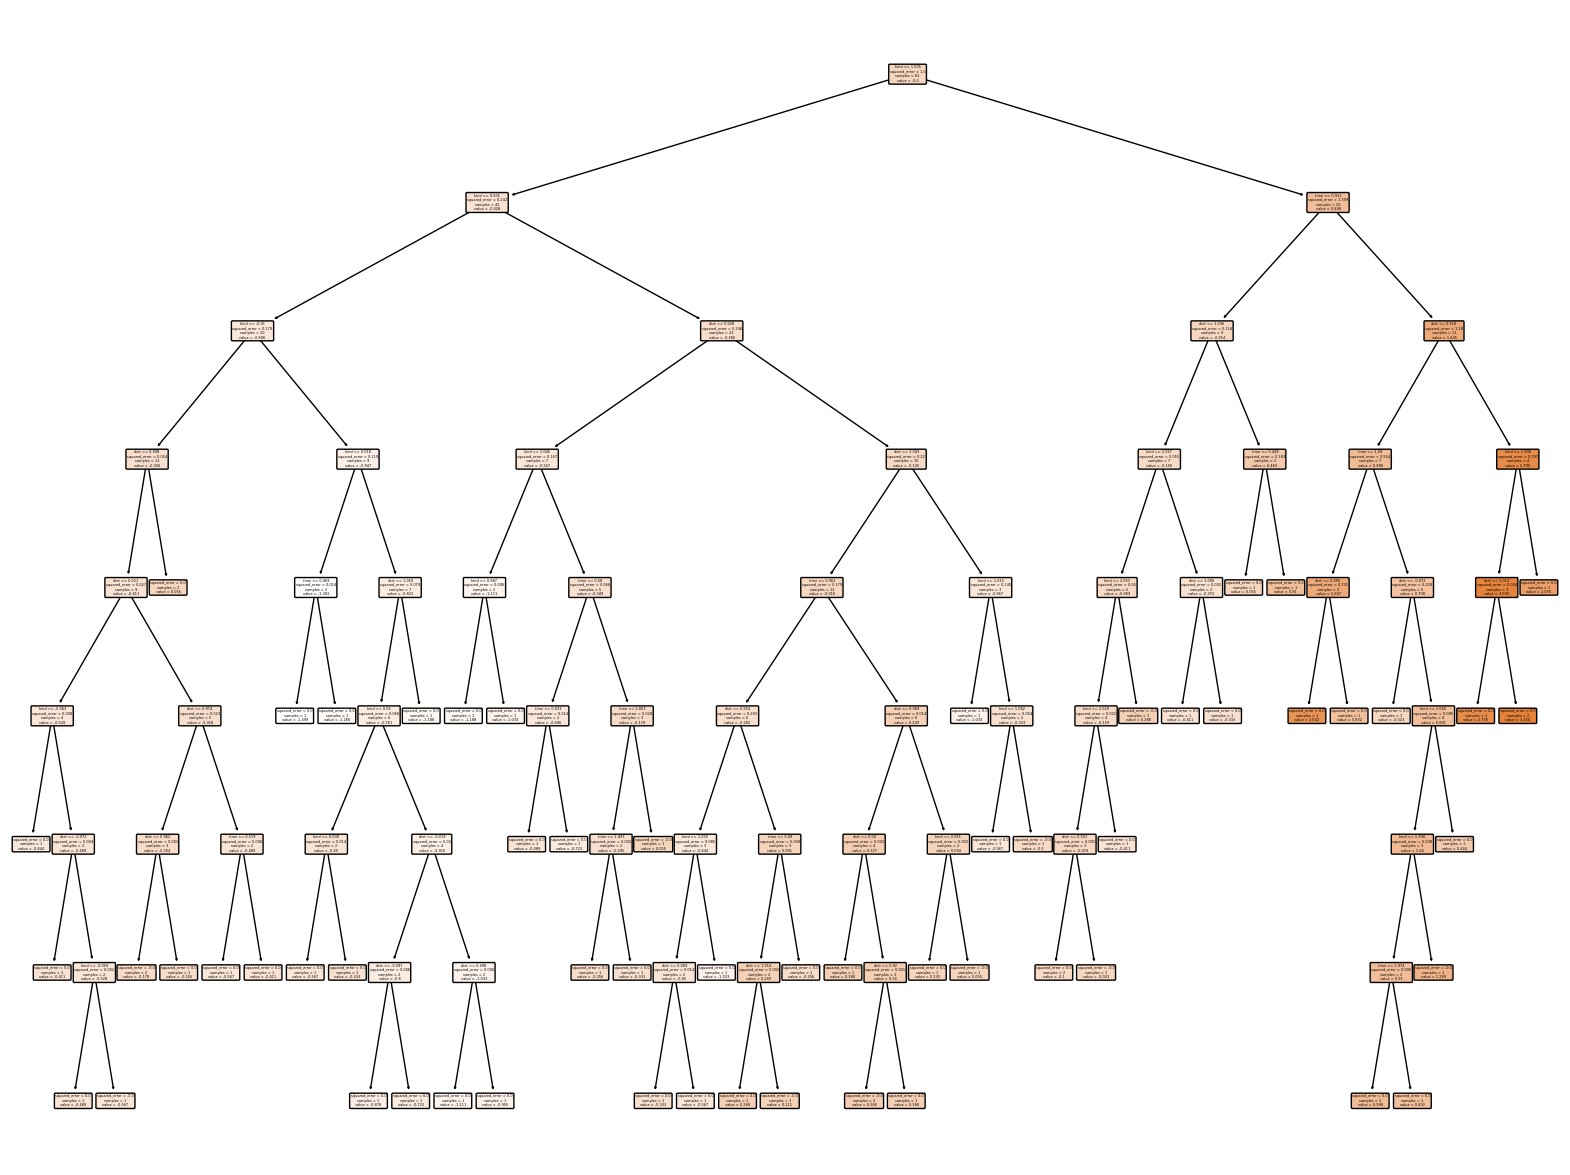

Train MSE: 0.000000000 | Validation MSE: 0.790540911 | Test MSE: 0.779321444



In [71]:
trees_with_no_noise = []

for depth in depths:
    tree = DecisionTreeModel(max_depth=depth)
    tree.train(X_train_denoised, y_train_normalized)
    trees_with_no_noise.append(tree)

for i, tree in enumerate(trees_with_no_noise):
    print(f"Decision Tree with Depth {depths[i]}")
    tree.visualize_tree(feature_names=list(X.columns))
    train_mse = tree.calculate_mse(X_train_denoised, y_train_normalized)
    val_mse = tree.calculate_mse(X_val_normalized, y_val_normalized)
    test_mse = tree.calculate_mse(X_test_normalized, y_test_normalized)
    
    print(f"Train MSE: {train_mse:.9f} | Validation MSE: {val_mse:.9f} | Test MSE: {test_mse:.9f}")
    print()

The smallest result for the testing error worsened, relative to the noisy data by 2%, and is 0.521855291 again for a depth of 4. This can be explained by the fact that the selected dataset is quite small in size and not very high-quality in terms of content.

Conclusion: In the process of experimenting, we learned the principles of working with algorithms of the principal component method (PCA) and decision trees. 

The effect of noise parameters on training data during model training was studied. It was found that noise distributed according to a uniform law negatively affects the prediction of the model on validation and test data. This confirms the importance of denoising and principal component extraction methods such as the PCA algorithm.

As a result of applying PCA, the transformed data became less dimensional because less covariant data and components were removed. Decreasing the dimensionality of the data led to a decrease in model prediction accuracy due to insufficient training data to reproduce important relationships.

In general, using the PCA algorithm on large amounts of data, where dimensionality reduction and noise removal does not result in information loss, can improve model performance and make predictions more accurate.